## Overview
This notebook focuses on data analysis and visualization related to predicting the smoke estimates.
## Key Steps
1. **Data Importing**: Reading a dataset ('df_years1_csv.csv') using pandas, indicating an analysis of yearly data.
2. **Data Exploration**: Examining DataFrame columns to understand the dataset's structure and features.
3. **Data Preprocessing**: Converting specific columns ('attributes_Fire_Year' and 'smoke_impact') to numeric types for analysis compatibility.
4. **Visualization**: Employing matplotlib for creating insightful visual representations of the data.
5. **Model Retraining**: Trying a variety of models to predict the smoke estimate and looking at the differences.



In [ ]:
import pandas as pd

## Grab the previous data with the smoke estimate column

In [19]:
df = pd.read_csv("df_years1_csv.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,3,13,20,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
df.columns

Index(['attributes_OBJECTID', 'attributes_USGS_Assigned_ID',
       'attributes_Assigned_Fire_Type', 'attributes_Fire_Year',
       'attributes_Fire_Polygon_Tier', 'attributes_Fire_Attribute_Tiers',
       'attributes_GIS_Acres', 'attributes_GIS_Hectares',
       'attributes_Source_Datasets', 'attributes_Listed_Fire_Types',
       'attributes_Listed_Fire_Names', 'attributes_Listed_Fire_Codes',
       'attributes_Listed_Fire_IDs', 'attributes_Listed_Fire_IRWIN_IDs',
       'attributes_Listed_Fire_Dates', 'attributes_Listed_Fire_Causes',
       'attributes_Listed_Fire_Cause_Class',
       'attributes_Listed_Rx_Reported_Acres',
       'attributes_Listed_Map_Digitize_Methods', 'attributes_Listed_Notes',
       'attributes_Processing_Notes', 'attributes_Wildfire_Notice',
       'attributes_Prescribed_Burn_Notice', 'attributes_Wildfire_and_Rx_Flag',
       'attributes_Overlap_Within_1_or_2_Flag', 'attributes_Circleness_Scale',
       'attributes_Circle_Flag', 'attributes_Exclude_From_Summary

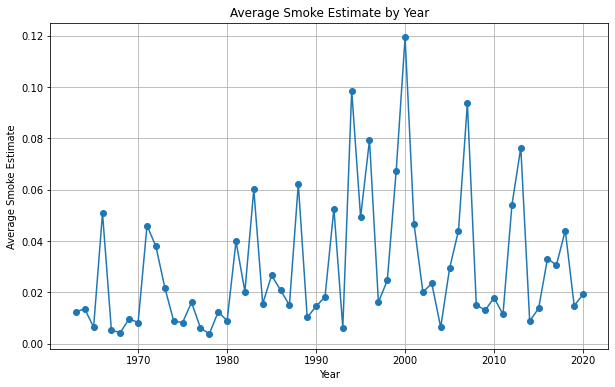

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'attributes_Fire_Year' and 'smoke_impact' columns to numeric, if they are not already
df['attributes_Fire_Year'] = pd.to_numeric(df['attributes_Fire_Year'], errors='coerce')
df['smoke_impact'] = pd.to_numeric(df['smoke_impact'], errors='coerce')

# Drop rows with NaN values that might have resulted from the conversion
df.dropna(subset=['attributes_Fire_Year', 'smoke_impact'], inplace=True)

# Calculating the average smoke impact for each year
average_smoke_by_year = df.groupby('attributes_Fire_Year')['smoke_impact'].mean()

# Plotting the average smoke impact per year with dots and a line
plt.figure(figsize=(10, 6))
plt.plot(average_smoke_by_year, marker='o', linestyle='-')
plt.title('Average Smoke Estimate by Year')
plt.xlabel('Year')
plt.ylabel('Average Smoke Estimate')
plt.grid(True)
plt.show()



In [8]:
df2 = pd.read_excel("estimates.xlsx")

In [24]:
df

,attributes_OBJECTID,attributes_USGS_Assigned_ID,attributes_Assigned_Fire_Type,attributes_Fire_Year,attributes_Fire_Polygon_Tier,attributes_Fire_Attribute_Tiers,attributes_GIS_Acres,attributes_GIS_Hectares,attributes_Source_Datasets,attributes_Listed_Fire_Types,...,attributes_Overlap_Within_1_or_2_Flag,attributes_Circleness_Scale,attributes_Circle_Flag,attributes_Exclude_From_Summary_Rasters,attributes_Shape_Length,attributes_Shape_Area,geometry_rings,geometry_curveRings,shortest_distance_to_logan,smoke_impact
0,14299,14299,Wildfire,1963.0,1.0,"1 (1), 3 (3)",40992.458271,16589.059302,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (3)",...,NaN,0.385355,NaN,No,73550.428118,1.658906e+08,"[[[-1538222.6155999992, 664547.1687000003], [-...",NaN,292.452481,0.479284
1,14300,14300,Wildfire,1963.0,1.0,"1 (1), 3 (3)",25757.090203,10423.524591,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (2)",...,NaN,0.364815,NaN,No,59920.576713,1.042352e+08,"[[[-1561373.1005000006, 710862.5734999999], [-...",NaN,323.475050,0.246159
2,14301,14301,Wildfire,1963.0,1.0,"1 (5), 3 (15), 5 (1)",45527.210986,18424.208617,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (6), Likely Wildfire (15)",...,NaN,0.320927,NaN,No,84936.827810,1.842421e+08,"[[[-1516651.6959000006, 689701.9166000001], [-...",NaN,289.770987,0.542202
3,14302,14302,Wildfire,1963.0,1.0,"1 (1), 3 (3), 5 (1)",10395.010334,4206.711433,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (3)",...,NaN,0.428936,NaN,No,35105.903602,4.206711e+07,"[[[-1495760.2166000009, 539132.1772000007], [-...",NaN,222.169331,0.210599
4,14303,14303,Wildfire,1963.0,1.0,"1 (1), 3 (3)",9983.605738,4040.221900,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (3)",...,NaN,0.703178,NaN,No,26870.456126,4.040222e+07,"[[[-1520641.9629999995, 654341.4522999991], [-...",NaN,280.705597,0.126703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112382,135057,135057,Prescribed Fire,2020.0,8.0,8 (3),16.412148,6.641761,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (3),...,"Caution, this Prescribed Fire in 2020 overlaps...",0.177425,NaN,No,2168.900740,6.641761e+04,"[[[-2008802.4960999992, 729335.5622000005], [-...",NaN,578.802441,0.000049
112383,135058,135058,Prescribed Fire,2020.0,8.0,8 (1),7.050837,2.853373,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (1),...,"Caution, this Prescribed Fire in 2020 overlaps...",0.374368,NaN,No,978.666221,2.853373e+04,"[[[-1648510.3187000006, 666410.7272999994], [-...",NaN,353.052861,0.000057
112384,135059,135059,Prescribed Fire,2020.0,8.0,8 (4),9.342668,3.780843,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (4),...,"Caution, this Prescribed Fire in 2020 overlaps...",0.123888,NaN,No,1958.326660,3.780843e+04,"[[[-1649244.5655000005, 664993.7576000001], [-...",NaN,352.889014,0.000075
112385,135060,135060,Prescribed Fire,2020.0,8.0,8 (1),0.996962,0.403456,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (1),...,NaN,0.993809,1.0,No,225.866452,4.034562e+03,"[[[-1017808.4253000002, 140344.1116000004], [-...",NaN,175.398687,0.000032


## Create a New Model

In [27]:
# Group by fire year and calculate the mean smoke impact for each year
df_grouped = df.groupby('attributes_Fire_Year')['smoke_impact'].mean().reset_index()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing the data for the model
X = df_grouped['attributes_Fire_Year'].values.reshape(-1, 1)
y = df_grouped['smoke_impact'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.00040539923119515647


In [29]:
import numpy as np

# Creating an array of future years
future_years = np.arange(df['attributes_Fire_Year'].max() + 1, 2050).reshape(-1, 1)

# Predicting future smoke impact
future_smoke_impact = model.predict(future_years)

# Creating a DataFrame for the predicted values
future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Smoke Impact': future_smoke_impact})


In [30]:
# Historical data
historical_df = pd.DataFrame({'Year': X.flatten(), 'Average Smoke Impact': y})

# Combining historical and forecasted data
df_final = pd.concat([historical_df, future_df], ignore_index=True)


In [31]:
df_final

,Year,Average Smoke Impact,Predicted Smoke Impact
0,1963.0,0.012500,NaN
1,1964.0,0.013614,NaN
2,1965.0,0.006497,NaN
3,1966.0,0.050899,NaN
4,1967.0,0.005255,NaN
...,...,...,...
82,2045.0,NaN,0.051650
83,2046.0,NaN,0.052027
84,2047.0,NaN,0.052405
85,2048.0,NaN,0.052783


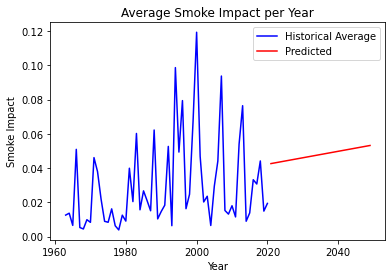

In [32]:
import matplotlib.pyplot as plt

# Plotting the historical data
plt.plot(historical_df['Year'], historical_df['Average Smoke Impact'], color='blue', label='Historical Average')

# Plotting the predicted data
plt.plot(future_df['Year'], future_df['Predicted Smoke Impact'], color='red', label='Predicted')

# Adding title and labels
plt.title('Average Smoke Impact per Year')
plt.xlabel('Year')
plt.ylabel('Smoke Impact')
plt.legend()

# Show the plot
plt.show()


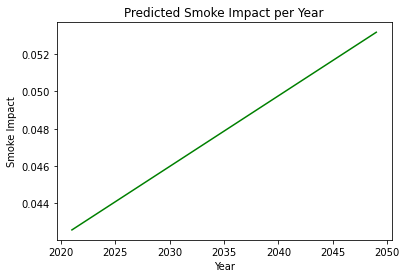

In [34]:
import matplotlib.pyplot as plt

# Assuming future_df contains the predicted smoke impact values
# future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Smoke Impact': future_smoke_impact})

# Plotting only the predicted smoke impact values
plt.plot(future_df['Year'], future_df['Predicted Smoke Impact'], color='green', label='Predicted Smoke Impact')

# Adding title and labels
plt.title('Predicted Smoke Impact per Year')
plt.xlabel('Year')
plt.ylabel('Smoke Impact')

# Displaying the plot
plt.show()



LinearRegression Mean Squared Error: 0.00040539923119515647


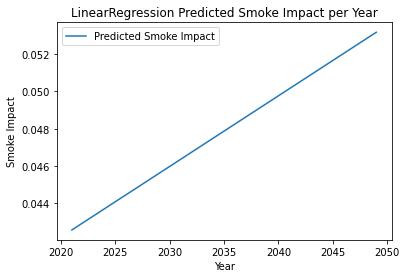

RandomForestRegressor Mean Squared Error: 0.0009112660731370755


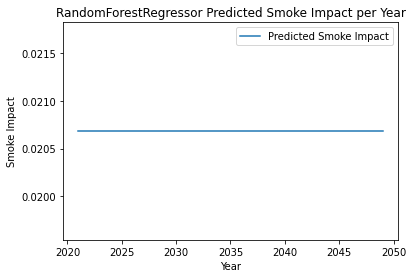

GradientBoostingRegressor Mean Squared Error: 0.000972823903289034


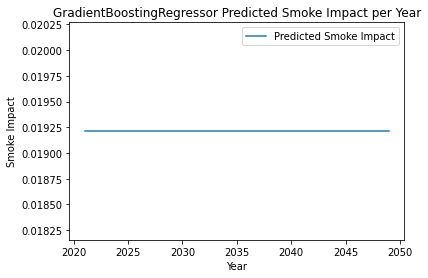

SVR Mean Squared Error: 0.00195081673448966


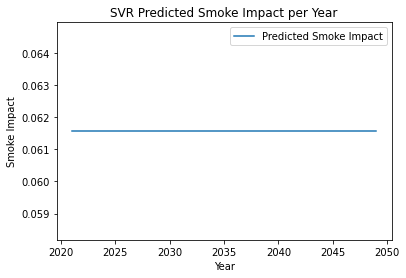

Sequential Mean Squared Error: 50.14251685123858


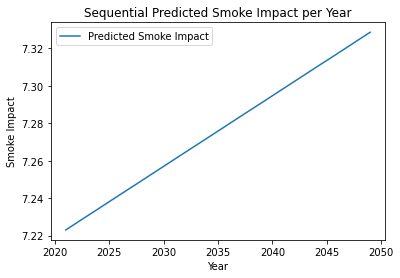

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def train_and_predict(df, models):
    # Preprocessing
    df_grouped = df.groupby('attributes_Fire_Year')['smoke_impact'].mean().reset_index()
    X = df_grouped['attributes_Fire_Year'].values.reshape(-1, 1)
    y = df_grouped['smoke_impact'].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    future_years = np.arange(df['attributes_Fire_Year'].max() + 1, 2050).reshape(-1, 1)

    for model in models:
        # Train model
        if isinstance(model, Sequential):
            # For Neural Network
            model.compile(loss='mean_squared_error', optimizer=Adam())
            model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        print(f'{model.__class__.__name__} Mean Squared Error: {mse}')

        # Predict future smoke impact
        if isinstance(model, Sequential):
            future_smoke_impact = model.predict(future_years).flatten()
        else:
            future_smoke_impact = model.predict(future_years)

        # Creating DataFrame for the predicted values
        future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Smoke Impact': future_smoke_impact})

        # Plotting the predicted smoke impact
        plt.figure()
        plt.plot(future_df['Year'], future_df['Predicted Smoke Impact'], label='Predicted Smoke Impact')
        plt.title(f'{model.__class__.__name__} Predicted Smoke Impact per Year')
        plt.xlabel('Year')
        plt.ylabel('Smoke Impact')
        plt.legend()
        plt.show()


# List of models to use
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=0),
    GradientBoostingRegressor(n_estimators=100, random_state=0),
    SVR(kernel='rbf'),
    Sequential([Dense(10, activation='relu', input_shape=(1,)), Dense(1)])
]

# Assuming df is your DataFrame
train_and_predict(df, models)


In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df is your original DataFrame and you have already grouped and averaged it
# Group by fire year and calculate the mean smoke impact for each year
df_grouped = df.groupby('attributes_Fire_Year')['smoke_impact'].mean().reset_index()

# Train the Linear Regression model
X = df_grouped['attributes_Fire_Year'].values.reshape(-1, 1)
y = df_grouped['smoke_impact'].values
model = LinearRegression()
model.fit(X, y)

# Predict for future years
future_years = np.arange(df['attributes_Fire_Year'].max() + 1, 2050).reshape(-1, 1)
predicted_impact = model.predict(future_years)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Smoke Impact': predicted_impact})

# Calculate the yearly percentage change
predictions_df['Yearly Percentage Change'] = predictions_df['Predicted Smoke Impact'].pct_change() * 100

# Display the DataFrame
print(predictions_df)


      Year  Predicted Smoke Impact  Yearly Percentage Change
0   2021.0                0.041164                       NaN
1   2022.0                0.041556                  0.952024
2   2023.0                0.041948                  0.943046
3   2024.0                0.042340                  0.934236
4   2025.0                0.042732                  0.925589
5   2026.0                0.043124                  0.917100
6   2027.0                0.043516                  0.908766
7   2028.0                0.043907                  0.900582
8   2029.0                0.044299                  0.892544
9   2030.0                0.044691                  0.884648
10  2031.0                0.045083                  0.876890
11  2032.0                0.045475                  0.869268
12  2033.0                0.045867                  0.861777
13  2034.0                0.046259                  0.854414
14  2035.0                0.046651                  0.847175
15  2036.0              

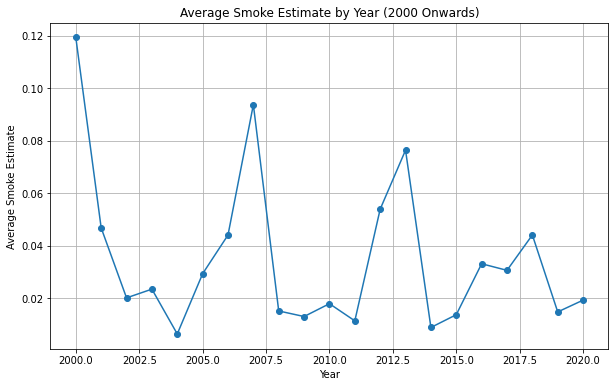

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'attributes_Fire_Year' and 'smoke_impact'
# Convert the 'attributes_Fire_Year' and 'smoke_impact' columns to numeric, if they are not already
df['attributes_Fire_Year'] = pd.to_numeric(df['attributes_Fire_Year'], errors='coerce')
df['smoke_impact'] = pd.to_numeric(df['smoke_impact'], errors='coerce')

# Drop rows with NaN values that might have resulted from the conversion
df.dropna(subset=['attributes_Fire_Year', 'smoke_impact'], inplace=True)

# Filter the DataFrame to only include years from 2000 onwards
df_filtered = df[df['attributes_Fire_Year'] >= 2000]

# Calculating the average smoke impact for each year in the filtered data
average_smoke_by_year_filtered = df_filtered.groupby('attributes_Fire_Year')['smoke_impact'].mean()

# Plotting the average smoke impact per year with dots and a line for the filtered data
plt.figure(figsize=(10, 6))
plt.plot(average_smoke_by_year_filtered, marker='o', linestyle='-')
plt.title('Average Smoke Estimate by Year (2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Average Smoke Estimate')
plt.grid(True)
plt.show()
